In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [ ]:
X,y=make_regression(n_samples=14,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.coef_

array([16.18657791])

In [ ]:
reg.intercept_

-18.493792151037653

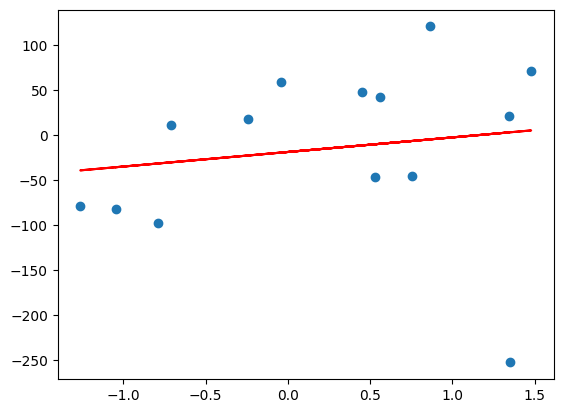

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red")

In [ ]:
#applying gradient descent assuming slope is m=16.18
# we assume the value of b to be constatnt thst is b=0.
y_pred=((16.18*X)+0).reshape(14)

In [ ]:
y_pred

array([  8.61322703,   9.10686099,  13.93440003,  23.92513523,
        21.84604022, -11.52648091, -12.76584242, -20.4127842 ,
        12.19594001,  -0.72005981,   7.31032364,  21.76374564,
        -3.93701876, -16.91420197])

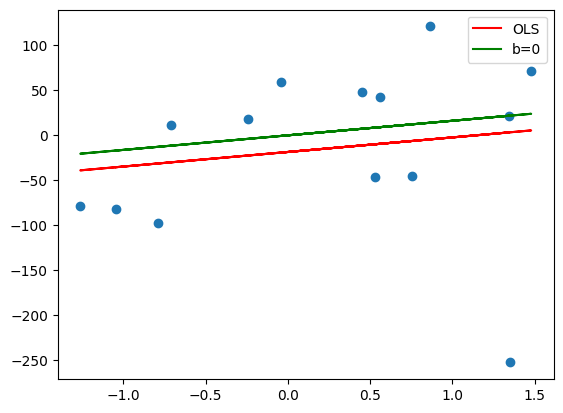

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred,color='green',label="b=0")
plt.legend()

In [ ]:
#calculatiing the slope for loss function
m=16.18
b=0
loss_function_slope=-2*np.sum(y-m*X.ravel()-b)
loss_function_slope

517.7835585503481

In [ ]:
#calculation of the step size
#step size=learning rate*loss function slope(b=b)
step_size=(0.01*loss_function_slope)
step_size


5.17783558550348

In [ ]:
b=b-step_size
b

-5.17783558550348

In [ ]:
y_pred1=((16.18*X)+b).reshape(14)

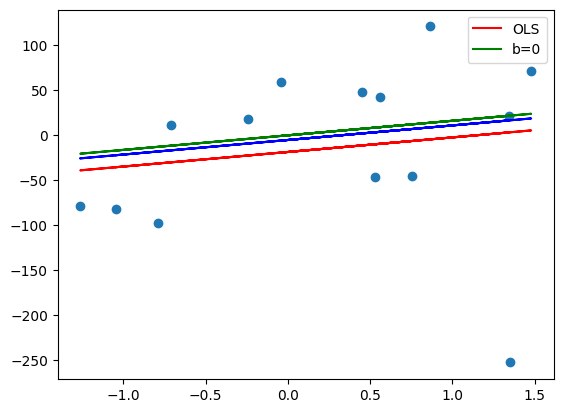

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred,color='green',label="b=0")
plt.plot(X,y_pred1,color='blue')
plt.legend()

In [ ]:
loss_function_slope=-2*np.sum(y-m*X.ravel()-b)
loss_function_slope

372.8041621562505

In [ ]:
step_size=(0.01*loss_function_slope)
step_size

3.728041621562505

In [ ]:
b=b-step_size

In [ ]:
y_pred2=((16.18*X)+b).reshape(14)

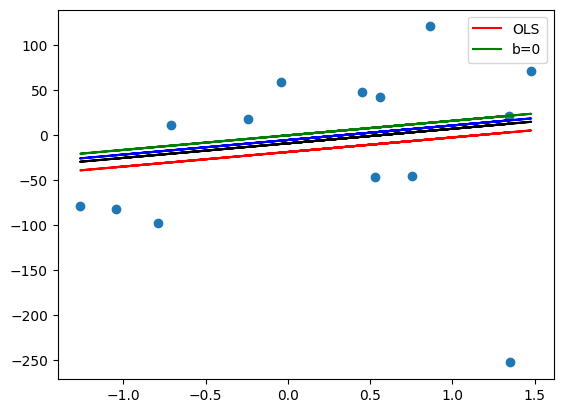

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred,color='green',label="b=0")
plt.plot(X,y_pred1,color='blue')
plt.plot(X,y_pred2,color='black')


plt.legend()

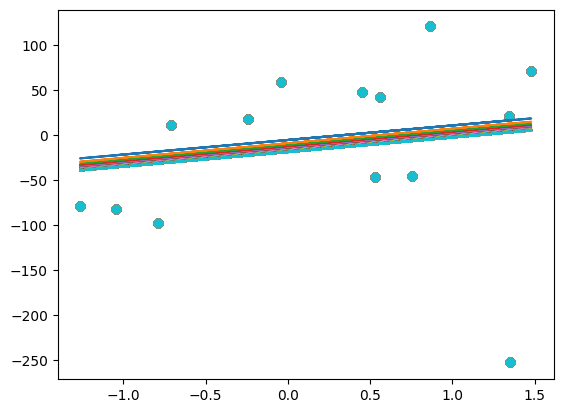

In [ ]:
m=16.18
b=0
epochs=100
for i in range(epochs):
  loss_function_slope=-2*np.sum(y-m*X.ravel()-b)
  step_size=(0.01*loss_function_slope)
  b=b-step_size
  y_pred=((m*X)+b).reshape(14)
  plt.scatter(X,y)
  plt.plot(X,y_pred,label=b)





###**CREATING OUR OWN GRADIENT DESCENT CLASS**


In [ ]:
class GD:

  def __init__(self,learning_rate,epochs):
    self.m=100
    self.b=-100
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,X,y):
    for i in range(self.epochs):
      loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
      loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
      self.b=self.b-(self.lr*loss_slope_b)
      self.m=self.m-(self.lr*loss_slope_m)
    print(self.b,self.m)
  def predict(self,y):
    y_pred=self.m*X+self.b
    print(y_pred)



In [ ]:
dg=GD(0.001,500)
dg.fit(X,y)

-18.498471262184385 16.193097996763075


In [ ]:

dg.predict(X)

[[ -9.87827167]
 [ -9.38423811]
 [ -4.55279108]
 [  5.44603179]
 [  3.36525371]
 [-30.03428306]
 [-31.27464786]
 [-38.92777997]
 [ -6.29265843]
 [-19.21911397]
 [-11.18222978]
 [  3.28289252]
 [-22.4386771 ]
 [-35.42636558]]


# **VISUALISATION: **

In [ ]:
b=100
m=100
lr=0.01
all_b=[]
all_m=[]
all_cost=[]
epoch=500

for i in range(epoch):
  slope_m=0
  slope_b=0
  cost=0
  for j in range(X.shape[0]):
   slope_m=slope_m-2*(y[j]-m*X[j]-b)*X[j]
   slope_b=slope_b-2*(y[j]-m*X[j]-b)
   cost=cost+(y[j]-m*X[j]-b)**2

   b=b-(lr*slope_b)
   m=m-(lr*slope_m)
   all_b.append(b)
   all_m.append(m)
   all_cost.append(cost)


In [ ]:
from matplotlib.animation import FuncAnimation

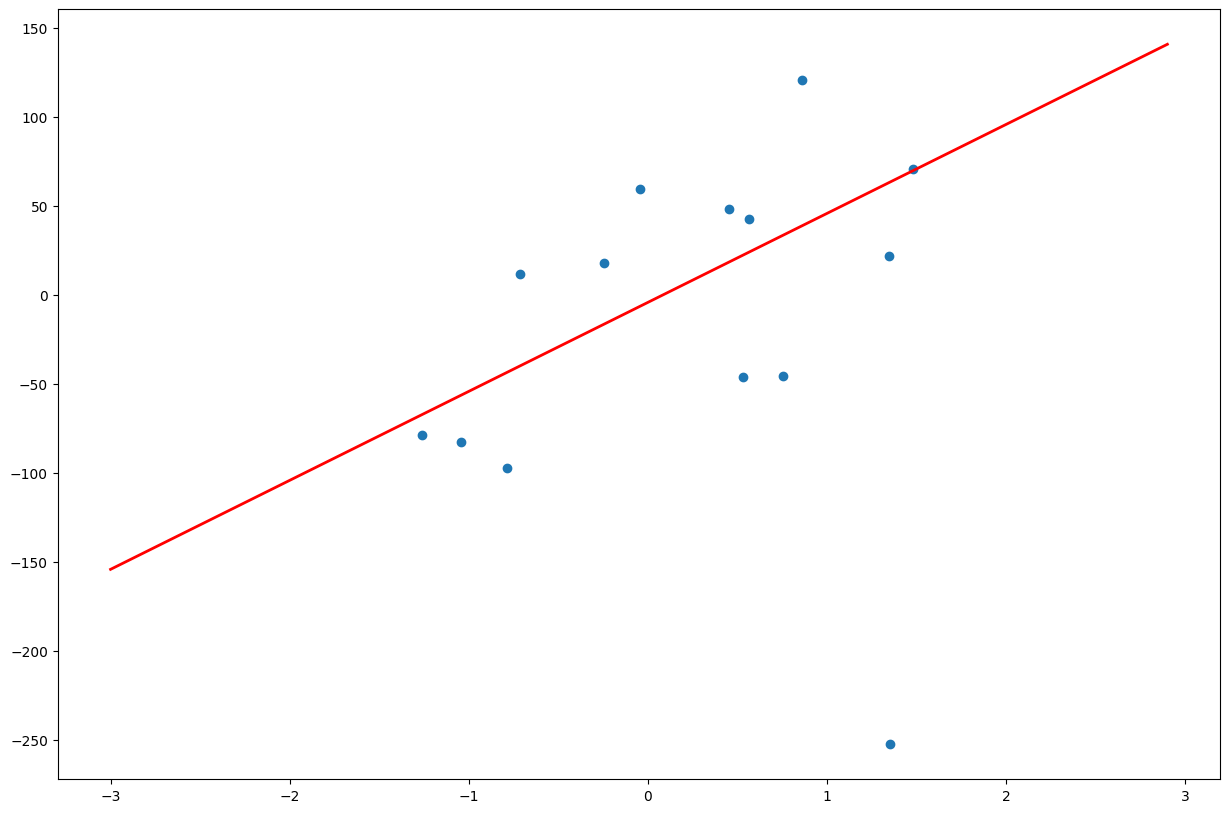

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i * (-27) - 150
ax.scatter(X, y)  # Assuming X and y are data arrays
line, = ax.plot(x_i, x_i * 50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * all_m[i] + all_b[i])  # Assuming all_m and all_b are arrays
    ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames=len(all_m), interval=500)

plt.show()

